# **Comparing PCA and LLE for Face Recognition**

## **Requirements:**
In this practice, you are required to understand the provided Python code, complete the `TODO` sections, and perform result analysis. The task focuses on applying and comparing the performance of two dimensionality reduction techniques: **Principal Component Analysis (PCA)** and **Locally Linear Embedding (LLE)** using the **Olivetti Faces dataset**. The **Olivetti Faces dataset** contains 400 grayscale face images of 64x64 pixels from 40 individuals. Each individual has ten images under different conditions (e.g., lighting, pose).


Your goals are as follows:  
- Implement PCA and LLE for dimensionality reduction on the **Olivetti Faces dataset**.  
- Optimize the parameters for both methods using **k-Nearest Neighbors (k-NN)** as the classifier.  
- Evaluate and compare the methods based on **accuracy** and **efficiency** (time performance).  

### **Deadline:** 22:00, Dec. 13th

The practice will be checked in this lab class or the next lab class (before **Dec. 13th**) by teachers or SAs.

### **Grading:**
* Submissions in this lab class: 1.1 points.
* Submissions on time: 1 point.
* Late submissions within 2 weeks after the deadline: 0.8 points.

## **1 Load and Explore the Dataset**
### **1.1 Load data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.manifold import LocallyLinearEmbedding

# Load Olivetti Faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data  # Shape (400, 4096), 400 samples of 64x64 pixels
y = data.target  # Labels for the 40 individuals

print("Data shape:", X.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/chanben/scikit_learn_data
Data shape: (400, 4096)


### **1.2 Visualize Sample Images**

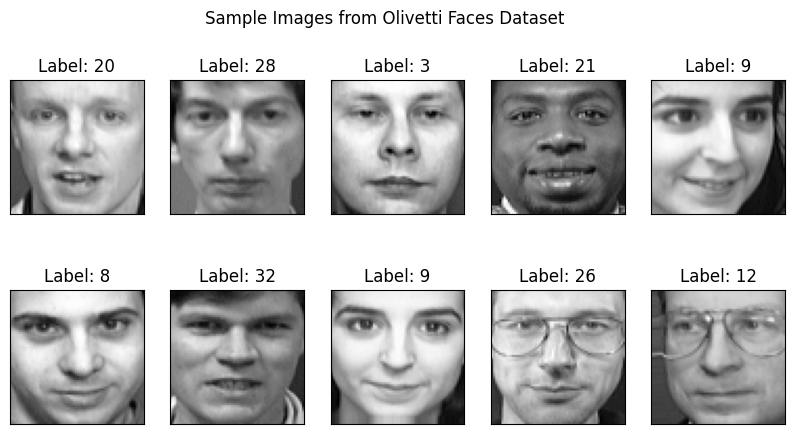

In [2]:
# Visualize a grid of sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Label: {y[i]}")
plt.suptitle("Sample Images from Olivetti Faces Dataset")
plt.show()

### **1.3 Show the face class histogram**

Text(0, 0.5, 'Number')

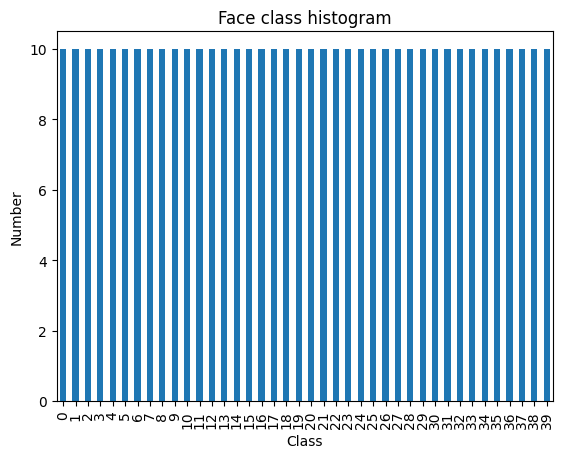

In [3]:
import pandas as pd
count_classes = pd.Series(y).value_counts().sort_index()
count_classes.plot(kind='bar')
plt.title("Face class histogram")
plt.xlabel("Class")
plt.ylabel("Number")

## **2 Train and Test k-NN on Raw Data**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 280, Test samples: 120


In [5]:
# Measure k-NN on raw data
start_time = time.time()
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)

knn_raw_time = time.time() - start_time
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"k-NN fit and predict Time on Raw Data: {knn_raw_time:.2f} seconds")
print(f"Accuracy of k-NN on raw data: {accuracy_raw:.2f}")

k-NN fit and predict Time on Raw Data: 0.16 seconds
Accuracy of k-NN on raw data: 0.83


## **3 Dimensionality Reduction with PCA**
Implement PCA for dimensionality reduction and tune the number of **components**.

In [6]:
from sklearn.decomposition import PCA
# TODO: Test different numbers of components for PCA
best_pca_acc = 0
best_pca_components = 0

for n_components in range(10, 201, 10):  # Test components from ? to ?
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train k-NN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred_pca = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred_pca)

    # Track the best parameters
    if acc > best_pca_acc:
        best_pca_acc = acc
        best_pca_components = n_components
        

print(f"Best PCA Accuracy: {best_pca_acc:.2f} with {best_pca_components} components.")

Best PCA Accuracy: 0.87 with 70 components.


## **4 Dimensionality Reduction with LLE**
Implement LLE and tune the number of **neighbors** and **components**.

In [7]:
from sklearn.manifold import LocallyLinearEmbedding

# TODO: Test different numbers of neighbors and components for LLE
best_lle_acc = 0
best_lle_params = (0, 0)

for n_neighbors in range(5, 21, 5):
    for n_components in range(10, 201, 10):
        try:
            lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
            X_train_lle = lle.fit_transform(X_train)
            X_test_lle = lle.transform(X_test)

            # Train k-NN
            knn = KNeighborsClassifier(n_neighbors=5)
            knn.fit(X_train_lle, y_train)
            y_pred_lle = knn.predict(X_test_lle)
            acc = accuracy_score(y_test, y_pred_lle)

            # Track the best parameters
            if acc > best_lle_acc:
                best_lle_acc = acc
                best_lle_params = (n_neighbors, n_components)

        except Exception as e:
            print(f"Failed for n_neighbors={n_neighbors}, n_components={n_components}: {e}")

print(f"Best LLE Accuracy: {best_lle_acc:.2f} with {best_lle_params[0]} neighbors and {best_lle_params[1]} components.")


Best LLE Accuracy: 0.94 with 20 neighbors and 160 components.


### **5 Efficiency Analysis**
Measure and compare the computational efficiency of PCA and LLE.

In [8]:
# TODO: Measure PCA Dimensionality Reduction Time
start_time = time.time()
pca = PCA(n_components=70)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca_time = time.time() - start_time
print(f"PCA Dimensionality Reduction Time: {pca_time:.2f} seconds")

# TODO: Measure LLE Dimensionality Reduction Time
start_time = time.time()
lle = LocallyLinearEmbedding(n_neighbors=20, n_components=160)
X_train_lle = lle.fit_transform(X_train)
X_test_lle = lle.transform(X_test)
lle_time = time.time() - start_time
print(f"LLE Dimensionality Reduction Time: {lle_time:.2f} seconds")

PCA Dimensionality Reduction Time: 0.05 seconds
LLE Dimensionality Reduction Time: 0.21 seconds


In [9]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
# TODO: Measure k-NN on raw data
start_time = time.time()
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
knn_raw_time = time.time() - start_time
acc_raw = accuracy_score(y_test, y_pred_raw)
print(f"k-NN Time on Raw Data: {knn_raw_time:.2f} seconds")
print(f"k-NN accuracy on Raw Data: {acc_raw:.2f}")

# TODO: Measure k-NN on PCA-reduced data
start_time = time.time()
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
knn_pca_time = time.time() - start_time
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"k-NN Time on PCA-Reduced Data: {knn_pca_time:.2f} seconds")
print(f"k-NN accuracy on PCA-Reduced Data: {acc_pca:.2f}")

# TODO: Measure k-NN on LLE-reduced data
start_time = time.time()
knn_lle = KNeighborsClassifier(n_neighbors=5)
knn_lle.fit(X_train_lle, y_train)
y_pred_lle = knn_lle.predict(X_test_lle)
knn_lle_time = time.time() - start_time
acc_lle = accuracy_score(y_test, y_pred_lle)
print(f"k-NN Time on LLE-Reduced Data: {knn_lle_time:.2f} seconds")
print(f"k-NN accuracy on LLE-Reduced Data: {acc_lle:.2f}")

k-NN Time on Raw Data: 0.11 seconds
k-NN accuracy on Raw Data: 0.83
k-NN Time on PCA-Reduced Data: 0.00 seconds
k-NN accuracy on PCA-Reduced Data: 0.86
k-NN Time on LLE-Reduced Data: 0.00 seconds
k-NN accuracy on LLE-Reduced Data: 0.94


#### **6 Visualize Results**
Compare k-NN accuracy and reduction time for raw data, PCA, and LLE.

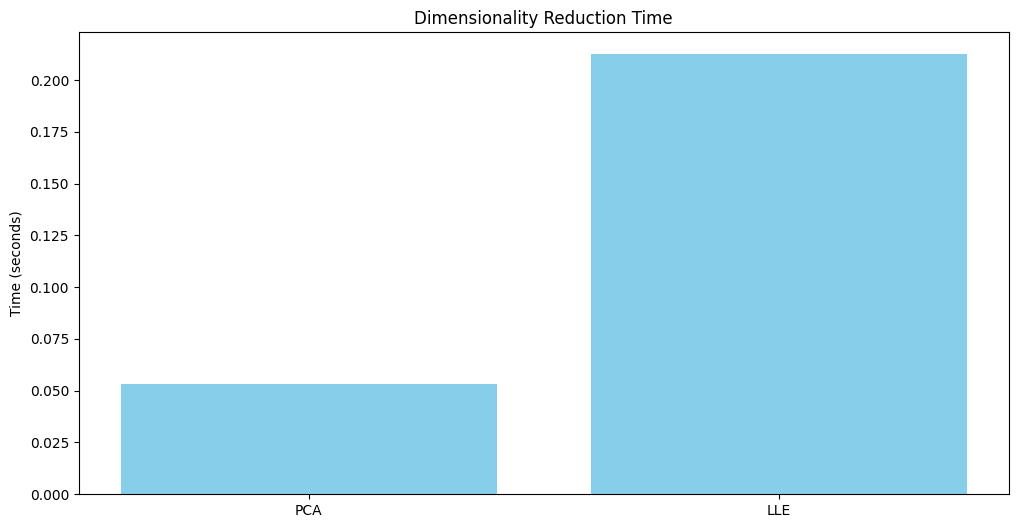

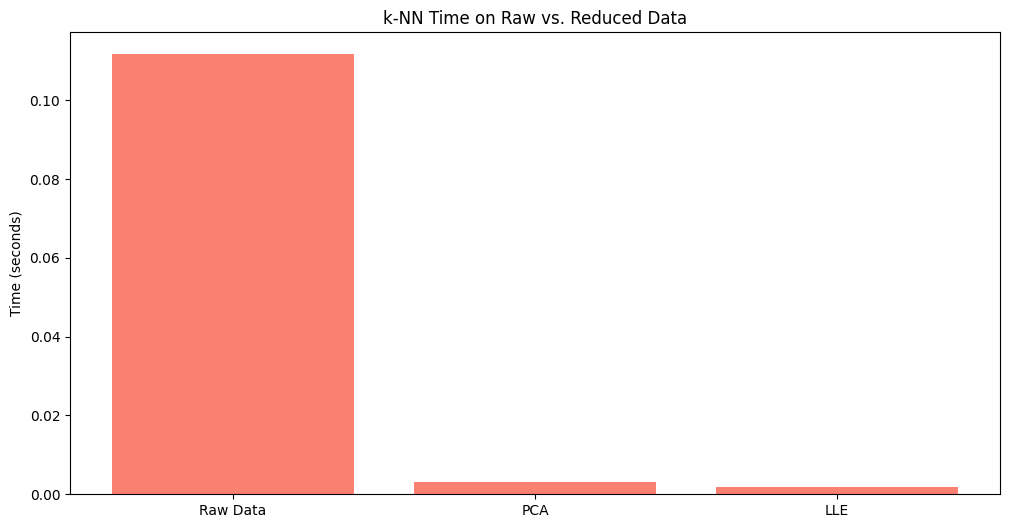

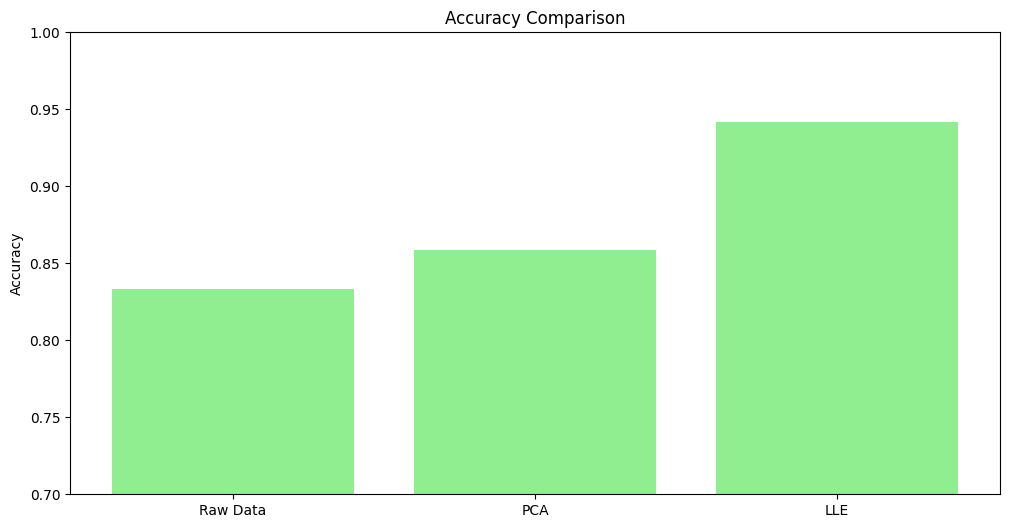

In [10]:
import matplotlib.pyplot as plt

# Efficiency data
methods = ['Raw Data', 'PCA', 'LLE']
reduction_times = [0, pca_time, lle_time]
knn_times = [knn_raw_time, knn_pca_time, knn_lle_time]

# Plot reduction time
plt.figure(figsize=(12, 6))
plt.bar(methods[1:], reduction_times[1:], color='skyblue', label='Dimensionality Reduction Time')
plt.ylabel('Time (seconds)')
plt.title('Dimensionality Reduction Time')
plt.show()

# Plot k-NN times
plt.figure(figsize=(12, 6))
plt.bar(methods, knn_times, color='salmon', label='k-NN Training + Prediction Time')
plt.ylabel('Time (seconds)')
plt.title('k-NN Time on Raw vs. Reduced Data')
plt.show()

# Accuracy data
methods = ['Raw Data', 'PCA', 'LLE']
accs = [acc_raw, acc_pca, acc_lle]

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.bar(methods, accs, color='lightgreen', label='Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)  # Set the y-axis limit to ensure clear visualization
plt.title('Accuracy Comparison')
plt.show()